## Двудольный граф

***Двудольный граф или биграф*** — граф, множество вершин которого можно разбить на две части таким образом, что каждое ребро графа соединяет какую-то вершину из одной части с какой-то вершиной другой части, то есть не существует ребра, соединяющего две вершины из одной и той же части.

## **Паросочетания *(определения)***
***Паросочетание M в двудольном графе*** — произвольное множество рёбер двудольного графа такое, что никакие два ребра не имеют общей вершины.

Число рёбер в наибольшем паросочетании графа G называется ***числом паросочетания***.

Вершины двудольного графа, инцидентные рёбрам паросочетания M, называются ***покрытыми***, а неинцидентные — ***свободными***.

***Чередующаяся цепь*** — путь в двудольном графе, для любых двух соседних рёбер которого верно, что одно из них принадлежит паросочетанию M
, а другое нет.

***Дополняющая цепь*** (или увеличивающая цепь) — чередующаяся цепь, у которой оба конца свободны.

***Полным паросочетанием*** называется паросочетание, в которое входят все вершины.





## **Теорема Бержа**
Паросочетание является максимальным тогда и только тогда, когда не существует увеличивающих относительно него цепей.

## **Теорема**
Если из вершины x
 не существует дополняющей цепи относительно паросочетания M
 и паросочетание M′
 получается из M
 изменением вдоль дополняющей цепи, тогда из x
 не существует дополняющей цепи в M′
.

## **Алгорит Куна**


Задан граф G⟨V,E⟩
, про который известно, что он двудольный, но разбиение не задано явно. Требуется найти наибольшее паросочетание в нём

Алгоритм можно описать так: сначала возьмём пустое паросочетание, а потом — пока в графе удаётся найти увеличивающую цепь, — будем выполнять чередование паросочетания вдоль этой цепи, и повторять процесс поиска увеличивающей цепи. Как только такую цепь найти не удалось — процесс останавливаем, — текущее паросочетание и есть максимальное.

В массиве 𝚖𝚊𝚝𝚌𝚑𝚒𝚗𝚐
 хранятся паросочетания (v,𝚖𝚊𝚝𝚌𝚑𝚒𝚗𝚐[v])
 (Если паросочетания с вершиной v
 не существует, то 𝚖𝚊𝚝𝚌𝚑𝚒𝚗𝚐[v]=−1
). А used
 — обычный массив "посещённостей" вершин в обходе в глубину (он нужен, чтобы обход в глубину не заходил в одну вершину дважды). Функция dfs
 возвращает true
, если ей удалось найти увеличивающую цепь из вершины v
, при этом считается, что эта функция уже произвела чередование паросочетания вдоль найденной цепи.

Внутри функции просматриваются все рёбра, исходящие из вершины v
, и затем проверяется: если это ребро ведёт в ненасыщенную вершину to
, либо если эта вершина to
 насыщена, но удаётся найти увеличивающую цепь рекурсивным запуском из 𝚖𝚊𝚝𝚌𝚑𝚒𝚗𝚐[to]
, то мы говорим, что мы нашли увеличивающую цепь, и перед возвратом из функции с результатом true
 производим чередование в текущем ребре: перенаправляем ребро, смежное с to
, в вершину v
.

В основной программе сначала указывается, что текущее паросочетание — пустое (массив 𝚖𝚊𝚝𝚌𝚑𝚒𝚗𝚐
 заполняется числами −1
). Затем перебирается вершина v
, и из неё запускается обход в глубину dfs
, предварительно обнулив массив used
.

Стоит заметить, что размер паросочетания легко получить как число вызовов dfs
 в основной программе, вернувших результат true
. Само искомое максимальное паросочетание содержится в массиве 𝚖𝚊𝚝𝚌𝚑𝚒𝚗𝚐
. После того, как все вершины v∈V
 будут просмотрены, текущее паросочетание будет максимальным. Корректность алгоритма следует из теоремы о максимальном паросочетании и дополняющих цепях и теоремы, описанной выше.

 [Подробнее про алгоритм](https://neerc.ifmo.ru/wiki/index.php?title=%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%9A%D1%83%D0%BD%D0%B0_%D0%B4%D0%BB%D1%8F_%D0%BF%D0%BE%D0%B8%D1%81%D0%BA%D0%B0_%D0%BC%D0%B0%D0%BA%D1%81%D0%B8%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B3%D0%BE_%D0%BF%D0%B0%D1%80%D0%BE%D1%81%D0%BE%D1%87%D0%B5%D1%82%D0%B0%D0%BD%D0%B8%D1%8F)

In [ ]:
# Обратите внимание: в графе G нулевая вершина не изолировна, ее просто нет
G = [[], [4], [4, 5], [5, 6], [1, 2], [2, 3], [3]]
n = len(G)


def dfs(v):
    if used[v]:
        return False
    used[v] = True
    for to in G[v]:
        if (matching[to] == -1) or dfs(matching[to]):
            matching[to] = v
            return True
    return False


matching = [-1] * n
for i in range(1, n):
    used = [False] * n
    dfs(i)

for i in range(1, n):
    if matching[i] != -1:
        print(i, matching[i], sep=' ')

# Восстановление максимального паросочетания в список
pares = []
used_for_pare = []
for i in range(1, n):
    if matching[i] != -1 and matching[i] not in used_for_pare:
        used_for_pare.append(i)
        pares.append([i, matching[i]])

print(pares)

# Проверка на существование полного паросочетания
if len(pares)*2 == (n-1):
    print('Perfect matching')

1 4
2 5
3 6
4 1
5 2
6 3


## **Теорема Кёнига**
Граф G
 является двудольным тогда и только тогда, когда все циклы в графе G
 имеют чётную длину.

***Доказательство***

1) *Необходимоть*

Рассмотрим двудольный граф из долей U и W. Если начать обход из U, то вернуться в нее можно только через четное кол-во ребер. Следовательно, любой цикл в G имеет четную длину.

 2) *Достаточность*

Пусть ненулевой граф G
 связен и не имеет циклов нечетной длины. Выберем произвольно вершину u
 и разобьем множество всех вершин на два непересекающихся множества U
 и V
 так, чтобы в U
 лежали вершины v0
, такие что кратчайшая цепь (u,v0)
 была чётной длины, а в V
 соответственно вершины v1
, для которых длина цепи (u,v1)
 — нечётная. При этом u∈U
. В графе G
 нет ребер ab
, таких что a,b
 лежат одновременно в U
 и V
. Докажем это от противного. Пусть a,b∈U
. Зададим P0
 — кратчайшая (u,a)
 цепь, а P1
 — кратчайшая (u,b)
 цепь. Обе цепи четной длины. Пусть v0
 — последняя вершина цепи P0
, принадлежащая P1
. Тогда подцепи от u
 до v0
 в P0
 и P1
 имеют одинаковую длину (иначе бы, пройдя по более короткой подцепи от u
 до v0
 мы смогли бы найти более короткую цепь от u
 до a
 или от u
 до b
, чем цепь P0
 или P1
 ). Так как подцепи от v0
 до a
 и от v0
 до b
 в цепях P0
 и P1
 имеют одинаковую четность, а значит в сумме с ребром ab
 они образуют цикл нечётной длины, что невозможно.


In [ ]:
# Проверка графа на двудольность с помощью теоремы Кенига

G = [[], [4, 5], [4], [5, 6], [1, 2], [1, 3], [3]]

# G = [[], [4, 5], [4], [5, 6], [1, 2], [1, 3, 6], [3, 5]]

n = len(G)


def dfs(start, visited, g, ok):
    if visited[start] == 0:
        visited[start] = 1
    for u in g[start]:
        ok.append(visited[u]==visited[start])
        if visited[u] == 0:
            if visited[start] == 1:
                visited[u] = 2
            elif visited[start] == 2:
                visited[u] = 1
            dfs(u, visited, g, ok)

    return ok


visited = [0] * n
ok = dfs(1, visited, G, [])

if max(ok):
    print('Nor binar')
else:
    print('Binar')

Binar


## **Теорема Хола (теорема о свадьбах)**

Полное паросочетание существует тогда и только тогда, когда для любого A⊂L выполнено |A|⩽|N(A)| ,

 где N(X)={y∈V∣(x,y)∈E,x∈X} - множество соседей X

(то есть для любого множетсва вершин левой доли A мощность этого множества не больше мощности множетсва соседей A).



***Доказательство***

1) *Необходимоть*

Если в графе есть полное паросочетание, то у каждой вершины хотя бы один сосед (по паросочетанию). Поэтому утверждение теоремы очевидно.

 2) *Достаточность*

 В обратную сторону докажем по индукции (будем добавлять в изначально пустое паросочетание P
 по одному ребру и доказывать, что мы можем это сделать, если P
 не полное). Таким образом, в конце получим что P
 — полное паросочетание.

**База индукции**

Вершина из L
 соединена хотя бы с одной вершиной из R
. Следовательно база верна.

**Индукционный переход**

Пусть после k<n
 шагов построено паросочетание P
. Докажем, что в P
 можно добавить вершину x
 из L
, не насыщенную паросочетанием P
. Рассмотрим множество вершин H
 — все вершины, достижимые из x
, если можно ходить из R
 в L
 только по ребрам из P
, а из L
 в R
 по любым ребрам из G
. Тогда в H
 найдется вершина y
 из R
, не насыщенная паросочетанием P
, иначе, если рассмотреть вершины HL
 (вершины из H
 принадлежащие L
), то для них не будет выполнено условие: |HL|⩽|N(HL)|
. Тогда существует путь из x
 в y
, который будет удлиняющим для паросочетания P
 (т.к из R
 в L
 мы проходили по ребрам паросочетания P
). Увеличив паросочетание P
 вдоль этого пути, получаем искомое паросочетание. Следовательно предположение индукции верно.



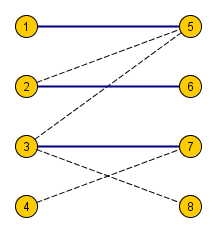

In [ ]:
from itertools import combinations
G = [[], [4], [4, 5], [5, 6], [1, 2], [2, 3], [3]]
# G = [[], [4], [4, 5], [5], [1, 2], [2, 3], []]

n = len(G)


def dfs(start, visited, left, g):
    if visited[start] == 0:
        visited[start] = 1
        left.append(start)
    for u in g[start]:
        if visited[u] == 0:
            if visited[start] == 1:
                visited[u] = 2
            elif visited[start] == 2:
                visited[u] = 1
                left.append(u)
            dfs(u, visited, left, g)

    return left


left = dfs(1, [0]*n, [], G)
combs = []
s = ''.join([str(j) for j in left])
for i in range(1, len(left)+1):
    for j in combinations(s, i):
                combs.append([int(k) for k in list(j)])

print(combs)
ok = 1
for comb in combs:
    used = set([0])
    for v in comb:
        used = used.union(set(G[v]))
    if len(used)-1 < len(comb):
        ok = 0
        break

if ok:
    print('Perfect matching')
else:
    print('No perfect matching')

# Задачи

1. На банкет были приглашены N Очень Важных Персон (ОВП). Были поставлены 2 стола. Столы достаточно большие, чтобы все посетители банкета могли сесть за любой из них. Проблема заключается в том, что некоторые ОВП не ладят друг с другом и не могут сидеть за одним столом. Вас попросили определить, возможно ли всех ОВП рассадить за двумя столами.

    Входные данные
    
    В первой строке входного файла INPUT.TXT дано два целых числа: N и M (0 ≤ N,M ≤ 100), где N - количество ОВП, а M - количество пар ОВП, которые не могут сидеть за одним столом. В следующих M строках записано по 2 числа - пары ОВП, которые не могут сидеть за одним столом.

    Выходные данные
    
    Если способ рассадить ОВП существует, то в выходной файл OUTPUT.TXT выведите YES и NO в противном случае.

    Пример
    
    INPUT.TXT \
    3 2 \
    1 2 \
    1 3
    
    OUTPUT.TXT \
    YES

2. Одной из классических задач комбинаторной оптимизации является так называемая «задача о назначениях». Формулируется она следующим образом.

    Есть N работников, пронумерованных числами от 1 до N, и N работ, также пронумерованных числами от 1 до N. Если i-ый работник выполняет j-ую работу, то ему выплачивается зарплата в размере Cij денежных единиц. Необходимо найти такое назначение работников на работы (каждый работник выполняет ровно одну работу, каждая работа выполняется ровно одним работником), что суммарная зарплата работников минимальна (соответствующая сумма называется стоимостью назначения).

    Напишите программу, решающую задачу о назначениях.

    Входные данные
    
    Входной файл INPUT.TXT содержит натуральное число N (N ≤ 100). Последующие N строк содержат по N чисел каждая. При этом j-ое число (i + 1)-ой строки равно Cij (1 ≤ Cij ≤ 20 000).

    Выходные данные
    
    В выходной файл OUTPUT.TXT выведите минимальную возможную стоимость назначения.


    Примеры
    
    INPUT.TXT \
    2 \
    1 2 \
    2 1 \
    
    OUTPUT.TXT \
    2
    
    \--------------------
    
    INPUT.TXT \
    2 \
    1 2 \
    3 4 \
    
    OUTPUT.TXT \
    5
    

3. Сколько полных паросочетаний содержится в полном графе из 6 вершин?

4. Родители подарили Пете набор детских кубиков. Поскольку Петя скоро пойдет в школу, они купили ему кубики с буквами. На каждой из шести граней каждого кубика написана буква.

    Теперь Петя хочет похвастаться перед старшей сестрой, что научился читать. Для этого он хочет сложить из кубиков ее имя. Но это оказалось довольно сложно сделать – ведь разные буквы могут находиться на одном и том же кубике и тогда Петя не сможет использовать обе буквы в слове. Правда одна и та же буква может встречаться на разных кубиках. Помогите Пете!

    Дан набор кубиков и имя сестры. Выясните, можно ли выложить ее имя с помощью этих кубиков и если да, то в каком порядке следует выложить кубики.

    Входные данные

    В первой строке входного файла INPUT.TXT записано целое число N (1 ≤ N ≤ 100) – количество кубиков в наборе у Пети. Во второй строке задано имя Петиной сестры – слово, состоящие только из больших английских букв, длиной от 1 до 100 символов. Следующие N строк содержат по 6 букв (только большие английские буквы), которые написаны на соответствующем кубике.

    Выходные данные

    В первой строке выходного файла OUTPUT.TXT выведите «YES», если выложить имя Петиной сестры данными кубиками можно, и «NO» в противном случае.

    В случае положительного ответа, во второй строке выведите M различных чисел из диапазона от 1 до N, где M – количество букв в имени Петиной сестры. i-е число должно быть номером кубика, который следует положить на i-е место при составлении имени Петиной сестры. Кубики нумеруются с 1, в том порядке, в котором они заданы во входных данных. Если решений несколько, выведите любое.

    Примеры

    INPUT.TXT \
    4 \
    ANN \
    ANNNNN \
    BCDEFG \
    HIJKLM \
    
    OUTPUT.TXT \
    NO
    
    \--------------------
    
    INPUT.TXT \
    5 \
    HELEN \
    ABCDEF \
    GHIJKL \
    MNOPQL \
    STUVWN \
    EIUOZK \
    
    OUTPUT.TXT \
    YES \
    2 1 3 5 4
    